In [1]:
import nibabel as nib

In [10]:
path = "/Users/ethantam/Desktop/personalCS/heartAI/data/cropped/pat0_cropped_seg.nii.gz"
# path = "/Users/ethantam/Desktop/personalCS/heartAI/data/cropped/pat0_cropped_seg_endpoints.nii.gz"

# Load the NIfTI file
nii_img = nib.load(path)

# Get the image data as a NumPy array
image_data = nii_img.get_fdata()

# Print shape of the data
print("Image shape:", image_data.shape)

Image shape: (127, 207, 141)


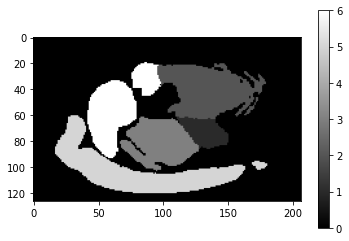

In [11]:
import matplotlib.pyplot as plt

# Display the middle slice along the z-axis
plt.imshow(image_data[:, :, image_data.shape[2] // 2], cmap="gray")
plt.colorbar()
plt.show()

In [16]:
import nibabel as nib
import numpy as np
import imageio
import matplotlib.pyplot as plt

# Load the NIfTI file
path = "/Users/ethantam/Desktop/personalCS/heartAI/data/cropped/pat2_cropped_seg.nii.gz"
# path = "/Users/ethantam/Desktop/personalCS/heartAI/data/cropped/pat0_cropped_seg_endpoints.nii.gz"
nii_img = nib.load(path)
image_data = nii_img.get_fdata()

# Normalize the image for better contrast
image_data = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data)) * 255
image_data = image_data.astype(np.uint8)

# Set GIF filename
gif_filename = "output.gif"

# Create a list to store frames
frames = []

# Iterate over slices in the z-axis
for i in range(image_data.shape[2]):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(image_data[:, :, i], cmap="gray")
    ax.axis("off")
    
    # Save the frame to a temporary buffer
    fig.canvas.draw()
    frame = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :3]  # Convert to RGB
    frames.append(frame)
    
    plt.close(fig)  # Close the figure to save memory

# Save as GIF
imageio.mimsave(gif_filename, frames, duration=0.1)  # Adjust duration as needed

print(f"GIF saved as {gif_filename}")


GIF saved as output.gif
